In [96]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import warnings
for dirname, _, filenames in os.walk('/Users/shmokh/Desktop/datasets .TI.csv'):
    for filename in filenames :
        print (os.path.join(dirname,filename))


In [97]:
taitanic=pd.read_csv('/Users/shmokh/Desktop/datasets_11657_16098_train.csv')
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
taitanic.shape

(891, 12)

In [99]:
taitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
taitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
taitanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
count1 = taitanic['Survived'].value_counts()[1]
count0 = taitanic['Survived'].value_counts()[0]

print(f"Number of non-survivors is: {count0}")
print(f"Number of survivors is: {count1}")

Number of non-survivors is: 549
Number of survivors is: 342


<Axes: xlabel='Survived', ylabel='count'>

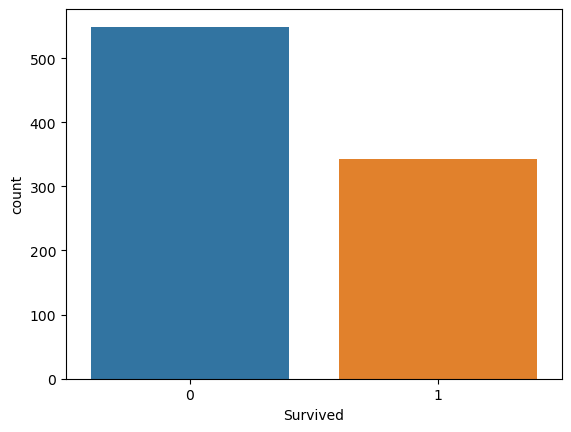

In [103]:
sns.countplot(x='Survived',data=taitanic)

<Axes: xlabel='Survived', ylabel='count'>

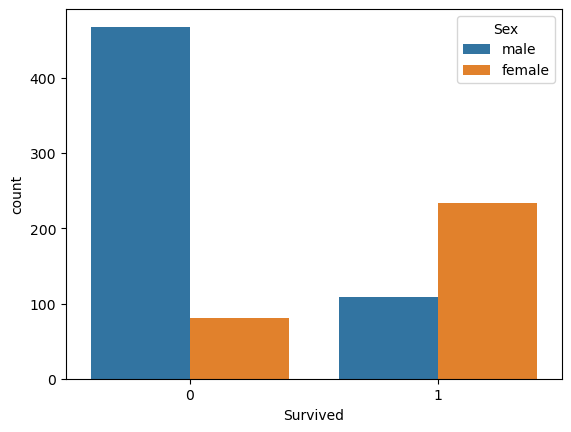

In [104]:
sns.countplot(x='Survived',hue='Sex',data=taitanic)

<Axes: ylabel='Embarked'>

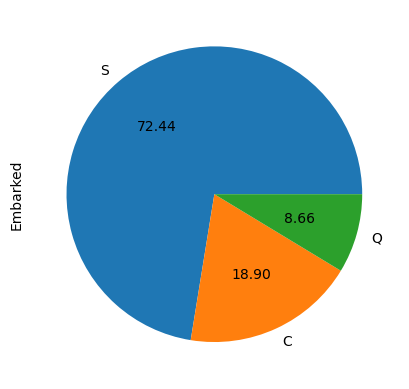

In [105]:
taitanic['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

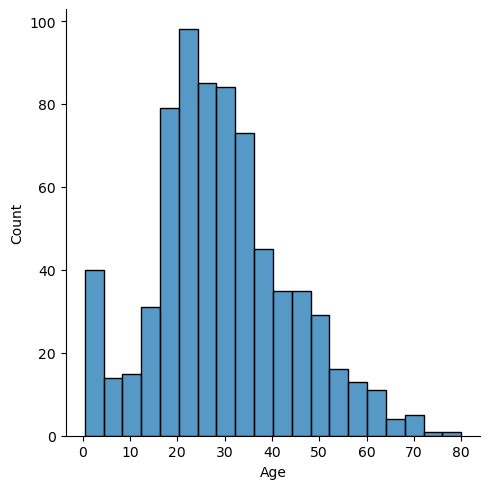

In [106]:
sns.displot(taitanic['Age'])

In [107]:
taitanic['Sex']=taitanic['Sex'].replace('male', 1, regex=True)
taitanic['Sex']=taitanic['Sex'].replace('female', 0, regex=True)

In [108]:
print (taitanic['Sex'].dtypes)

int64


In [109]:
taitanic['Age'] = taitanic['Age'].fillna(taitanic['Age'].median())

In [122]:
taitanic["Embarked"].drop_duplicates()
taitanic["Embarked"].unique()

array(['S', 'C', 'Q', 1], dtype=object)

In [123]:
taitanic['Embarked']= taitanic['Embarked'].replace(['S' , 'C' ,'Q' ], [ 1 , 2 , 3], regex=True)

In [124]:
taitanic['Embarked'] = taitanic['Embarked'].fillna(1)

In [125]:
shuffle = taitanic.sample(frac = 1)
shuffle.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",1,45.0,0,0,223596,13.5000,NaN,1
32,33,1,3,"Glynn, Miss. Mary Agatha",1,28.0,0,0,335677,7.7500,NaN,3
235,236,0,3,"Harknett, Miss. Alice Phoebe",1,28.0,0,0,W./C. 6609,7.5500,NaN,1
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",1,48.0,0,0,17466,25.9292,D17,1
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",1,28.0,0,0,35852,7.7333,NaN,3


In [126]:
rate = 0.85
total_rows = taitanic.shape[0]
train_size = int(total_rows*rate)

train = shuffle[0:train_size]
test = shuffle[train_size:]

In [127]:
rows_count_test = len(test.index)
rows_count_train = len(train.index)
print("train ="  , rows_count_train , "   test = " , rows_count_test)

train = 757    test =  134


In [138]:
y_train=train["Survived"]
y_test=test["Survived"]

train_data = ["Age", "Sex","Pclass",  "SibSp" ,"Parch","Fare","Embarked"]
X_train = pd.get_dummies(train[train_data])
X_test  = pd.get_dummies(test[train_data])

model_RF = RandomForestClassifier(n_estimators=120 , max_depth=10 , random_state=2 )

history = model_RF.fit(X_train,y_train)

In [160]:
y_pred = model_RF.predict(X_test)
print(accuracy_score(y_test, y_pred)*100 , "%")

76.86567164179104 %


In [140]:
model = svm.SVC(kernel='linear', degree=7)
model.fit(X_train, y_train)

SVC(degree=7, kernel='linear')

In [152]:
predictions_poly = model_RF.predict(X_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print(" Accuracy" , str(accuracy_poly*100 ), "%")

 Accuracy 76.86567164179104 %


In [168]:
warnings.filterwarnings("ignore")
iris = load_iris()
X = shuffle [["Age"	, "Sex" ,	"Pclass"	,  "SibSp" ,	"Parch"
, "Fare", "Embarked"	]]
y = shuffle["Survived"]

model = LogisticRegression()
k = 7

kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

In [169]:
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score*100}","%")

print(f"Mean accuracy: {scores.mean()*100}","%")
print(f"Standard deviation: {scores.std()*100}","%")

Fold 1: 68.75 %
Fold 2: 67.1875 %
Fold 3: 75.59055118110236 %
Fold 4: 70.86614173228347 %
Fold 5: 70.07874015748031 %
Fold 6: 62.20472440944882 %
Fold 7: 77.95275590551181 %
Mean accuracy: 70.37577334083241 %
Standard deviation: 4.847790793913416 %
